In [16]:
#Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [17]:
#Análise dos dados
df = pd.read_csv('coviditalycases1.csv', header=0, index_col=0)
df

,new_cases
date,
2019/12/31,0
2020/01/01,0
2020/01/02,0
2020/01/03,0
2020/01/04,0
...,...
2020/06/02,178
2020/06/03,318
2020/06/04,321


In [19]:
# Definição do Eixo x do gráfico
times = pd.date_range(start='31/12/2019', end='06/06/2020')

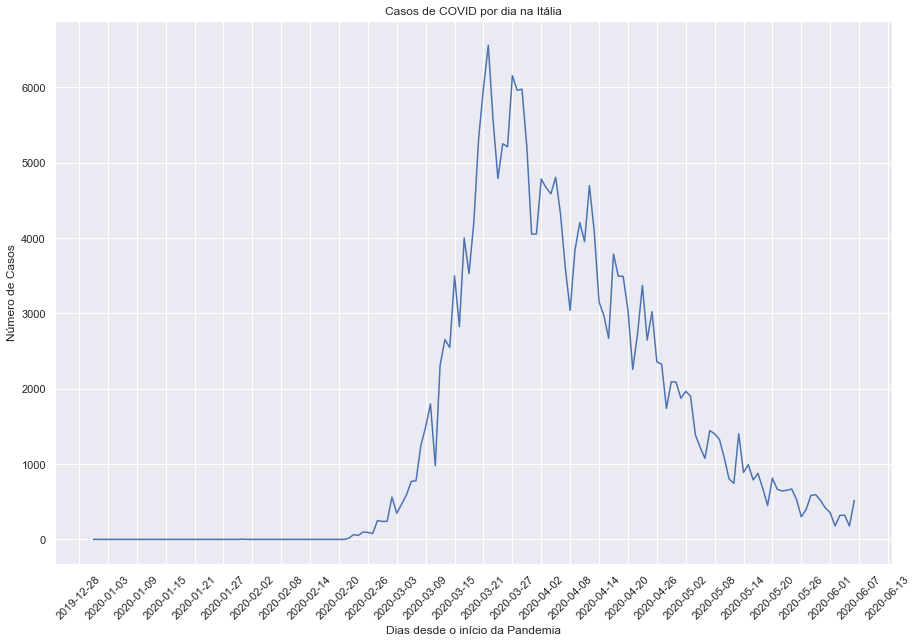

In [35]:
#Plot do gráfico
def plot_temp(df):
    fig, ax = plt.subplots(figsize=(15,10))
    plt.title("Casos de COVID por dia na Itália")
    plt.xlabel('Dias desde o início da Pandemia')
    plt.ylabel('Número de Casos') 
    ax.plot(times, df)
    ax.set_xticks(times)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    _=plt.xticks(rotation=45)
    plt.savefig('coviditagraf.png')
plot_temp(df)

In [4]:
# Definição dos dados utilizados para KDE:
XN1 = df["new_cases"]
XN = sorted(XN1)
N = len(XN)
X = np.arange(min(XN), max(XN), 0.1)
h1 = 1
h2 = 5
h3 = 15
h4 = 30
f1 = []
f2 = []
f3 = []
f4 = []
fe1 = []
fe2 = []
fe3 = []
fe4 = []

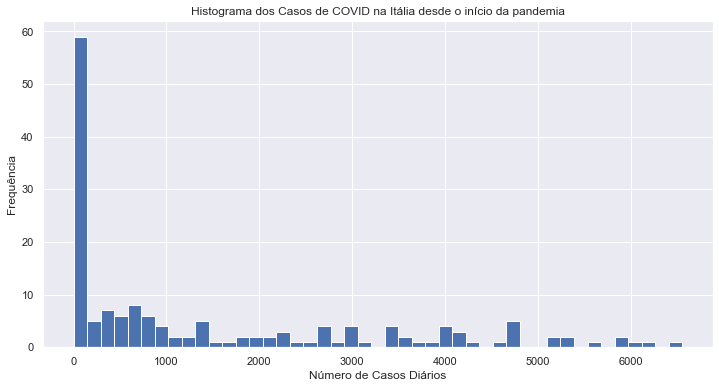

In [13]:
# Plot dos Histogramas
sns.set()
plt.figure(figsize=(12,6))
plt.hist(XN1, bins = 45)
plt.title('Histograma dos Casos de COVID na Itália desde o início da pandemia')
plt.xlabel('Número de Casos Diários')
plt.ylabel('Frequência')
plt.savefig('histcoviditalia.png')

In [6]:
# Equações para KDE Uniforme

# Definição da KDE Uniforme com h = 1:
for x1 in X:
    fx1 = 0
    U1 = [(x1-xn1)/(2*h1) for xn1 in XN]
    for u1 in U1:
        if abs(u1) <= 1:
            fx1 += (1/N)*(1/2)        
        f1.append(fx1)
        
# Definição da KDE Uniforme com h = 5:
for x2 in X:
    fx2 = 0
    U2 = [(x2-xn2)/(2*h2) for xn2 in XN]
    for u2 in U2:
        if abs(u2) <= 1:
            fx2 += (1/N)*(1/2)        
        f2.append(fx2)

# Definição da KDE Uniforme com h = 15:
for x3 in X:
    fx3 = 0
    U3 = [(x3-xn3)/(2*h3) for xn3 in XN]
    for u3 in U3:
        if abs(u3) <= 1:
            fx3 += (1/N)*(1/2)        
        f3.append(fx3)
        
# Definição da KDE Uniforme com h = 30
for x4 in X:
    fx4 = 0
    U4 = [(x4-xn4)/(2*h4) for xn4 in XN]
    for u4 in U4:
        if abs(u4) <= 1:
            fx4 += (1/N)*(1/2)        
        f4.append(fx4)
        
#Definição do eixo x do gráfico que irá representar KDE
AxisX = np.linspace(min(XN),max(XN),len(f1))

C:\Users\erhon\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\erhon\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


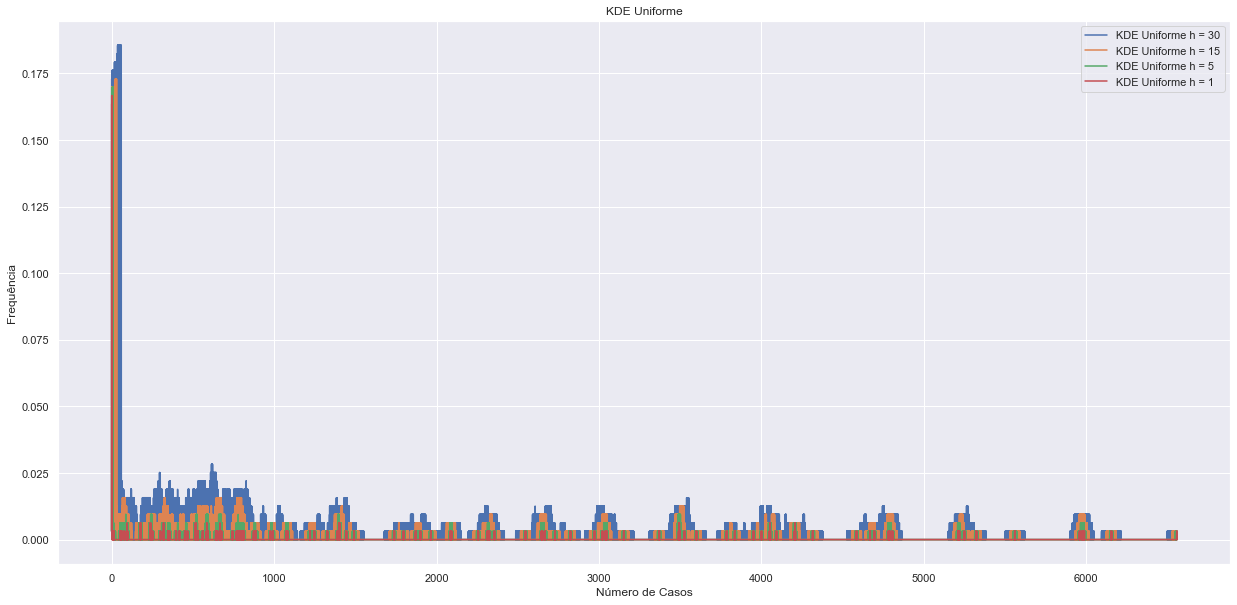

In [14]:
def plot_dados():
    fig, ax = plt.subplots(figsize=(21,10)) 
    plt.title("KDE Uniforme")
    plt.xlabel('Número de Casos')
    plt.ylabel('Frequência')
    ax.plot(AxisX,f4, label = 'KDE Uniforme h = 30')
    ax.plot(AxisX,f3, label = 'KDE Uniforme h = 15')
    ax.plot(AxisX,f2, label = 'KDE Uniforme h = 5')
    ax.plot(AxisX,f1, label = 'KDE Uniforme h = 1')
    plt.legend()
    plt.savefig('KDEUniformIta.png')
plot_dados()

In [9]:
# Equações para KDE Epanechnikov

# Definição da KDE Epanechnikov com h = 1:
for xe1 in X:
    fxe1 = 0
    Ue1 = [(xe1-xne1)/(2*h1) for xne1 in XN]
    for ue1 in Ue1:
        if abs(ue1) <= 1:
            fxe1 += (1/N)*(3/4)*(1-ue1**2)        
        fe1.append(fxe1)

# Definição da KDE Epanechnikov com h = 5:
for xe2 in X:
    fxe2 = 0
    Ue2 = [(xe2-xne2)/(2*h2) for xne2 in XN]
    for ue2 in Ue2:
        if abs(ue2) <= 1:
            fxe2 += (1/N)*(3/4)*(1-ue2**2)        
        fe2.append(fxe2)

# Definição da KDE Epanechnikov com h = 15:
for xe3 in X:
    fxe3 = 0
    Ue3 = [(xe3-xne3)/(2*h3) for xne3 in XN]
    for ue3 in Ue3:
        if abs(ue3) <= 1:
            fxe3 += (1/N)*(3/4)*(1-ue3**2)        
        fe3.append(fxe3)
        
# Definição da KDE Epanechnikov com h = 30:        
for xe4 in X:
    fxe4 = 0
    Ue4 = [(xe4-xne4)/(2*h4) for xne4 in XN]
    for ue4 in Ue4:
        if abs(ue4) <= 1:
            fxe4 += (1/N)*(3/4)*(1-ue4**2)        
        fe4.append(fxe4)

C:\Users\erhon\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\erhon\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


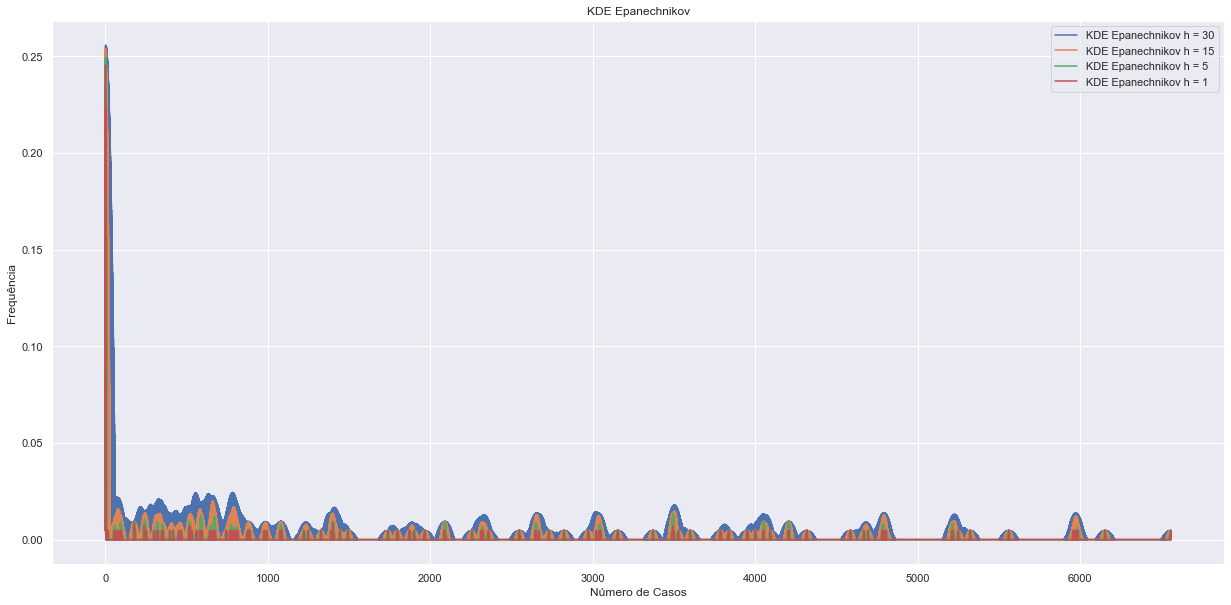

In [15]:
def plot_dadose():
    fig, ax = plt.subplots(figsize=(21,10)) 
    plt.title("KDE Epanechnikov")
    plt.xlabel('Número de Casos')
    plt.ylabel('Frequência')
    ax.plot(AxisX,fe4, label='KDE Epanechnikov h = 30')
    ax.plot(AxisX,fe3, label='KDE Epanechnikov h = 15')
    ax.plot(AxisX,fe2, label='KDE Epanechnikov h = 5')
    ax.plot(AxisX,fe1, label='KDE Epanechnikov h = 1')
    plt.legend()
    plt.savefig('KDEEpaIta.png')
plot_dadose()

In [37]:
# Definição da janela de Hann para o número de dados:
window = np.hanning(159)

# Multiplicação dos dados pela janela:
w = [S*D for D,S in zip(XN1, window)]

# Aplicação da função de Fourier:
F = np.fft.fft(w)

# Densidade Espectral
s = [f*np.conj(f) for f in F]
sd = np.fft.fftshift(s)

# Eixo x do gráfico FFT:
n = np.arange(-79,80,1)

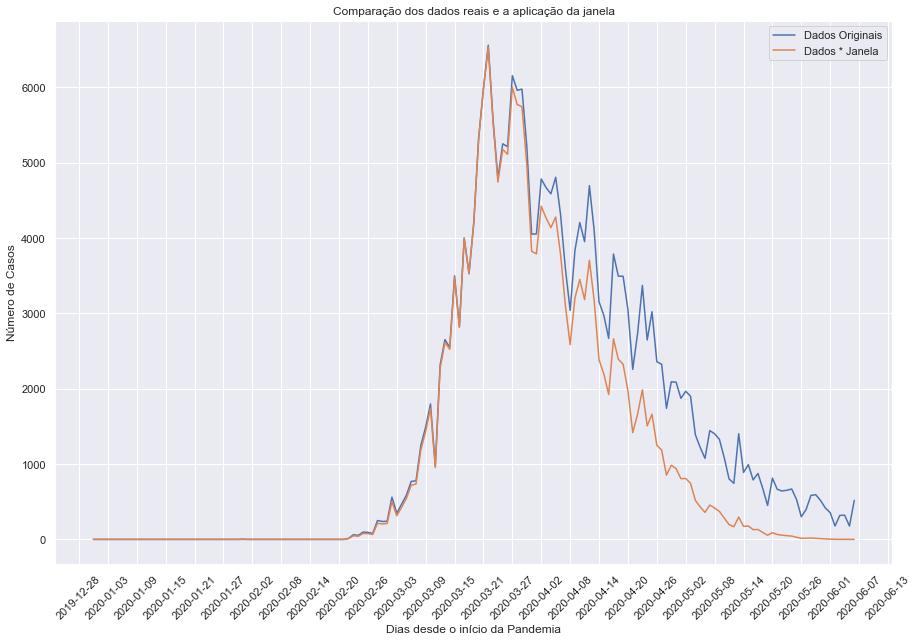

In [34]:
#Plot do gráfico + janela:
def plot_temp(df, w):
    fig, ax = plt.subplots(figsize=(15,10))
    plt.title("Comparação dos dados reais e a aplicação da janela")
    plt.xlabel('Dias desde o início da Pandemia')
    plt.ylabel('Número de Casos') 
    ax.plot(times, df, label = "Dados Originais")
    ax.plot(times, w, label = "Dados * Janela")
    ax.set_xticks(times)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter("%Y-%m-%d"))
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=6))
    _=plt.xticks(rotation=45)
    plt.legend()
    plt.savefig('coviditaxjanela.png')
plot_temp(df, w)

C:\Users\erhon\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


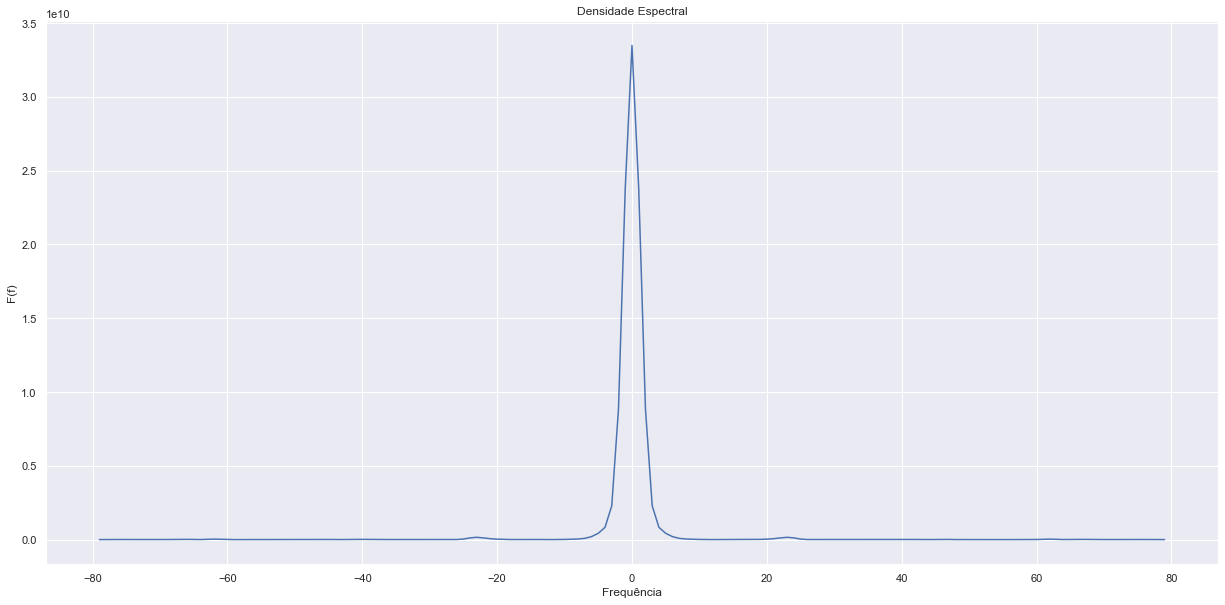

In [39]:
# Plot da Densidade Espectral:
def plot_sd(sd):
    fig, ax = plt.subplots(figsize=(21,10))
    plt.title("Densidade Espectral")
    plt.xlabel('Frequência')
    plt.ylabel('F(f)') 
    ax.plot(n,sd)
    plt.savefig('spectraldensity.png')
plot_sd(sd)